In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries and load dataset

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

#add list of other libraries used here

In [3]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/locations.csv')
print(df.shape)
df.head(3)

(83711, 106)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20200611182946,2020-06-16,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.54
1,13913,https://www.airbnb.com/rooms/13913,20200611182946,2020-06-16,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,...,f,f,moderate,f,f,3,1,2,0,0.18
2,15400,https://www.airbnb.com/rooms/15400,20200611182946,2020-06-16,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,...,t,f,strict_14_with_grace_period,t,t,1,1,0,0,0.70


In [4]:
#viewing every columns properly
count = 1
for i in df.columns:
  print(count, i)
  count += 1

1 id
2 listing_url
3 scrape_id
4 last_scraped
5 name
6 summary
7 space
8 description
9 experiences_offered
10 neighborhood_overview
11 notes
12 transit
13 access
14 interaction
15 house_rules
16 thumbnail_url
17 medium_url
18 picture_url
19 xl_picture_url
20 host_id
21 host_url
22 host_name
23 host_since
24 host_location
25 host_about
26 host_response_time
27 host_response_rate
28 host_acceptance_rate
29 host_is_superhost
30 host_thumbnail_url
31 host_picture_url
32 host_neighbourhood
33 host_listings_count
34 host_total_listings_count
35 host_verifications
36 host_has_profile_pic
37 host_identity_verified
38 street
39 neighbourhood
40 neighbourhood_cleansed
41 neighbourhood_group_cleansed
42 city
43 state
44 zipcode
45 market
46 smart_location
47 country_code
48 country
49 latitude
50 longitude
51 is_location_exact
52 property_type
53 room_type
54 accommodates
55 bathrooms
56 bedrooms
57 beds
58 bed_type
59 amenities
60 square_feet
61 price
62 weekly_price
63 monthly_price
64 security

In [5]:
#copy the original dataframe as df1 and modification on df
df1=df.copy()
df1.shape

(83711, 106)

In [6]:
#1. Take only the columns that are necessary for analysis
# No of reviews datas was found misleading so it has not been considered here
df = df[['id','description','city']]
#df = df[['id','description','zipcode']]
df

,id,description,city
0,11551,Unlike most rental apartments out there my fla...,London
1,13913,My bright double bedroom with a large window h...,Islington
2,15400,Lots of windows and light. St Luke's Gardens ...,London
3,17402,You'll have a wonderful stay in this superb mo...,London
4,17506,Enjoy a chic stay in this elegant but fully mo...,London
...,...,...,...
83706,43747259,All bills included and WiFi. Each room has it ...,Greater London
83707,43748104,Located in a top neighborhood the apartment wi...,London
83708,43748730,This amazing apartment is located in a modern ...,Greater London
83709,43749033,Huge luxury double room en-suite recently refu...,Greater London


In [7]:
# Check if any data set or columns are duplicated or not
print(sum(df.duplicated(keep="first")),"transaction rows affected")
df.dtypes


0 transaction rows affected


id              int64
description    object
city           object
dtype: object

In [8]:
#Check for any NaN values that affect the dataset
print('Number of rows in each column affected by existence of non-existing values:')
df.isnull().sum()

Number of rows in each column affected by existence of non-existing values:


id                0
description    3014
city            453
dtype: int64

In [9]:
#1. Separate missing description rows
#dfNAdesc=df[(df.description.isnull())]
#print(dfNAdesc.shape)
#dfNAdesc.to_csv('No descriptions.csv',index=False)
#df=df[~(dfdescription.isnull())]
#print(df.shape)

#1. Separate missing number of reviews rows
#dfZeroreview=df[ (df['number_of_reviews']==0)]   
#print(dfZeroreview.shape)
#dfZeroreview.to_csv('Zeroreview.csv',index=False)
#df=df[~(df['number_of_reviews']==0)]
#print(df.shape)


In [10]:
# Separate missing city rows and check the whether datas and null or not by saving to to csv and checking manually
dfNAcity=df[(df.city.isnull())]
print(dfNAcity.shape)
dfNAcity.to_csv('No city.csv',index=False)
df=df[~(df.city.isnull())]
#print(df.shape)

# Check whether city's name are in other language that cannot be analyzed
#dfIcity=df[~(df.city.isalnum())]
#print(dfIcity.shape)
#dfIcity.to_csv('Invalid.csv',index=False)
#df=df[(df.city.isalnum())]
# checking whether city has spaces and striping it
for i in range(len(df)):
  df['city'].values[i] = (df['city'].values[i]).strip()
  #if(city_name.isalnum()):
  #  df['city'].values[i] = city_name
print(df['city'].unique())
print(len(df['city'].unique()))


(453, 3)
['London' 'Islington' 'Barnet' 'Twickenham' 'Richmond' 'East Finchley'
 'Hackney' 'Upper Norwood' 'Greater London' 'Hounslow' 'Walthamstow'
 'Hammersmith' 'Kensington' 'Stratford' 'Notting Hill' 'Lambeth' 'Croydon'
 'Camden Town' 'Ilford' 'Tottenham' 'Camberwell' 'Morden' 'Lewisham'
 'Wandsworth' 'Romford' 'Paddington' 'London Borough of Wandsworth'
 'Eltham' 'Feltham' 'Earlsfield' 'Poplar' 'North Kensington' 'Ealing'
 'Highgate, London' 'Central London Narrowboat' 'Merton' 'Muswell Hill'
 'Dalston Square' 'london' 'Barking' 'KENNINGTON' 'Brent' 'Enfield'
 'Notting Hill Gate' 'East Ham' 'Greenwich' 'Hillingdon' 'Pinner'
 'London,' 'Wembley' 'Ruislip' 'Dagenham' 'City of Westminster' 'Uxbridge'
 'Mitcham' 'Oval' 'Chingford' 'Orpington' 'Bromley' 'New Malden'
 'Road Shepherds Bush' 'Teddington' 'Queens Park' 'Putney'
 'Buckhurst Hill' 'Wimbledon' 'canning town,london' 'Lee' 'Limehouse'
 'Harrow' 'London/Wood Green' 'North Finchley' 'West Dulwich'
 'Ilford, London' 'teddington' '

In [11]:
# Separate missing zipcode rows
#dfNAzipcode=df[(df.zipcode.isnull())]
#print(dfNAzipcode.shape)
#dfNAzipcode.to_csv('No zipcode.csv',index=False)
#df=df[~(df.zipcode.isnull())]
#print(df.shape)

# Check whether zipcode's name are in other language that cannot be analyzed
#dfIzipcode=df[~(df.zipcode.isalnum())]
#print(dfIzipcode.shape)
#dfIzipcode.to_csv('Invalid.csv',index=False)
#df=df[(df.zipcode.isalnum())]
# checking whether zipcode has spaces and striping it
#for i in range(len(df)):
#  df['zipcode'].values[i] = (df['zipcode'].values[i]).strip()
  #if(zipcode_name.isalnum()):
  #  df['zipcode'].values[i] = zipcode_name
#print(df['zipcode'].unique())
#print(len(df['zipcode'].unique()))

In [12]:
df

,id,description,city
0,11551,Unlike most rental apartments out there my fla...,London
1,13913,My bright double bedroom with a large window h...,Islington
2,15400,Lots of windows and light. St Luke's Gardens ...,London
3,17402,You'll have a wonderful stay in this superb mo...,London
4,17506,Enjoy a chic stay in this elegant but fully mo...,London
...,...,...,...
83706,43747259,All bills included and WiFi. Each room has it ...,Greater London
83707,43748104,Located in a top neighborhood the apartment wi...,London
83708,43748730,This amazing apartment is located in a modern ...,Greater London
83709,43749033,Huge luxury double room en-suite recently refu...,Greater London


In [13]:
#if district was added to column
#df.insert(2,'district',"")
#df

In [14]:
#if zipcode was used instead to find a unique address and kept in a column district
#import json, http.client, requests
#from urllib.request import urlopen
#from urllib.parse import urlencode
#for i in range(len(df)):

#address_query = "SE1 9BG"
#  params = {"api_key": "iddqd", "query": df.iloc[i,3]}

 # conn = http.client.HTTPSConnection("api.ideal-postcodes.co.uk:443")
 #conn.request("GET", "/v1/addresses?%s" % urlencode(params))

  #addresses = json.load(conn.getresponse())['result']
  #df.iloc[i,2]= addresses['hits'][0]['district']
  #print(df.iloc[i,2])

In [15]:
# cleaning the review.csv file
#loading the dataset of Review file:

review = pd.read_csv('/content/drive/MyDrive/reviews.csv.gz')
review.head()





,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [16]:
review.shape

(1163886, 6)

In [17]:
# Check any duplicated data set and column formats
print(sum(review.duplicated(keep="first")),"transaction rows affected")
review.dtypes

0 transaction rows affected


listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [18]:
#1. Take only the columns that are necessary for analysis
review = review[['listing_id','comments']]
print(review)

         listing_id                                           comments
0             13913  My girlfriend and I hadn't known Alina before ...
1             13913  Alina was a really good host. The flat is clea...
2             13913  Alina is an amazing host. She made me feel rig...
3             13913  Alina's place is so nice, the room is big and ...
4             13913  Nice location in Islington area, good for shor...
...             ...                                                ...
1163881    47957224  Salahudin was a great host! He was extremely a...
1163882    47975947             Great place, very pleasent, great host
1163883    47975947  Cosy place , comfortable beds , location was g...
1163884    47979693  Easy check in, great place and location, the p...
1163885    48039462  Elizabeth is the ultimate host. She made every...

[1163886 rows x 2 columns]


In [19]:
print(review.shape)

(1163886, 2)


In [20]:
#1. Remove rows that do not contain comments.
reviewNAcomments=review[(review.comments.isnull())]
print(reviewNAcomments.shape)
reviewNAcomments.to_csv('No comments.csv',index=False)
review=review[~(review.comments.isnull())]
print(review.shape)

(512, 2)
(1163374, 2)


In [21]:
#1. Remove rows that do not contain listing_id.
print("Listing id with null value: %d" %len(review[(review.comments.isnull())]))



Listing id with null value: 0


In [22]:
#group the dataframe by listing id and then bring all the comments to a particular listing_id to group according to the listing_id
review_group = review.groupby('listing_id')
review = review_group.apply(lambda x: list(x['comments']))

In [23]:
review

listing_id
13913       [My girlfriend and I hadn't known Alina before...
15400       [We loved staying at Phillipa's place in Chels...
17402       [Amazing location - great apartment, plenty of...
25123       [10,000 times better and cheaper than staying ...
33332       [The room is spacious and cozy, and the house ...
                                  ...                        
47948833                              [Fantastic hospitality]
47957224    [Salahudin was a great host! He was extremely ...
47975947    [Great place, very pleasent, great host, Cosy ...
47979693    [Easy check in, great place and location, the ...
48039462    [Elizabeth is the ultimate host. She made ever...
Length: 54334, dtype: object

In [24]:
#Convert from series to dataframe
review = review.to_frame('comments')
review

,comments
listing_id,
13913,[My girlfriend and I hadn't known Alina before...
15400,[We loved staying at Phillipa's place in Chels...
17402,"[Amazing location - great apartment, plenty of..."
25123,"[10,000 times better and cheaper than staying ..."
33332,"[The room is spacious and cozy, and the house ..."
...,...
47948833,[Fantastic hospitality]
47957224,[Salahudin was a great host! He was extremely ...
47975947,"[Great place, very pleasent, great host, Cosy ..."


In [25]:
# merging full review + add only specific columns from df
cleaned_df = pd.merge(left=review, right=df, how='left', left_on=review.index, right_on='id')
cleaned_df

,comments,id,description,city
0,[My girlfriend and I hadn't known Alina before...,13913,My bright double bedroom with a large window h...,Islington
1,[We loved staying at Phillipa's place in Chels...,15400,Lots of windows and light. St Luke's Gardens ...,London
2,"[Amazing location - great apartment, plenty of...",17402,You'll have a wonderful stay in this superb mo...,London
3,"[10,000 times better and cheaper than staying ...",25123,Big room with double bed/ clean sheets/ clean ...,Barnet
4,"[The room is spacious and cozy, and the house ...",33332,"Walking distance to Twickenham Stadium, 35 min...",Twickenham
...,...,...,...,...
54329,[Fantastic hospitality],47948833,NaN,NaN
54330,[Salahudin was a great host! He was extremely ...,47957224,NaN,NaN
54331,"[Great place, very pleasent, great host, Cosy ...",47975947,NaN,NaN
54332,"[Easy check in, great place and location, the ...",47979693,NaN,NaN


In [26]:
#1. Separate missing city rows
cleaned_dfNAcity=cleaned_df[(cleaned_df.city.isnull())]
print(cleaned_dfNAcity.shape)
cleaned_dfNAcity.to_csv('No city.csv',index=False)
cleaned_df=cleaned_df[~(cleaned_df.city.isnull())]
#print(df.shape)


(6480, 4)


In [27]:
#1. Checking if there are null value for no of reviews or not
#cleaned_dfNAnumber_of_reviews=cleaned_df[(cleaned_df.number_of_reviews.isnull())]
#print(cleaned_dfNAnumber_of_reviews.shape)



In [28]:
#saving the clean file as final_cleaned_file
cleaned_df.to_csv('final_cleaned_file.csv',index=False)

In [29]:
cleaned_df

,comments,id,description,city
0,[My girlfriend and I hadn't known Alina before...,13913,My bright double bedroom with a large window h...,Islington
1,[We loved staying at Phillipa's place in Chels...,15400,Lots of windows and light. St Luke's Gardens ...,London
2,"[Amazing location - great apartment, plenty of...",17402,You'll have a wonderful stay in this superb mo...,London
3,"[10,000 times better and cheaper than staying ...",25123,Big room with double bed/ clean sheets/ clean ...,Barnet
4,"[The room is spacious and cozy, and the house ...",33332,"Walking distance to Twickenham Stadium, 35 min...",Twickenham
...,...,...,...,...
51401,"[A beautiful space, and a very nice host! Very...",43734475,NaN,Greater London
51407,[Marianna's place is a beautiful home with ver...,43736332,We are offering our guest bedroom to visitors ...,Greater London
51409,"[Outstanding service! Great communication, ama...",43739441,"You have the entire house just for yourself, p...",Greater London
51412,"[Great experience, nice service. Not everythin...",43747259,All bills included and WiFi. Each room has it ...,Greater London


In [30]:
print(len(cleaned_df['city'].unique()))

467


In [31]:
cleaned_df.insert(1,'positive_comment', 0)
cleaned_df.insert(2,'neutral_comment', 0)
cleaned_df.insert(2,'negative_comment', 0)

In [32]:
cleaned_df

,comments,positive_comment,negative_comment,neutral_comment,id,description,city
0,[My girlfriend and I hadn't known Alina before...,0,0,0,13913,My bright double bedroom with a large window h...,Islington
1,[We loved staying at Phillipa's place in Chels...,0,0,0,15400,Lots of windows and light. St Luke's Gardens ...,London
2,"[Amazing location - great apartment, plenty of...",0,0,0,17402,You'll have a wonderful stay in this superb mo...,London
3,"[10,000 times better and cheaper than staying ...",0,0,0,25123,Big room with double bed/ clean sheets/ clean ...,Barnet
4,"[The room is spacious and cozy, and the house ...",0,0,0,33332,"Walking distance to Twickenham Stadium, 35 min...",Twickenham
...,...,...,...,...,...,...,...
51401,"[A beautiful space, and a very nice host! Very...",0,0,0,43734475,NaN,Greater London
51407,[Marianna's place is a beautiful home with ver...,0,0,0,43736332,We are offering our guest bedroom to visitors ...,Greater London
51409,"[Outstanding service! Great communication, ama...",0,0,0,43739441,"You have the entire house just for yourself, p...",Greater London
51412,"[Great experience, nice service. Not everythin...",0,0,0,43747259,All bills included and WiFi. Each room has it ...,Greater London


# Strategy
1. Unique id/listing_id is used as identifier in both the dataset which is used to merge the data. All the comments belonging to a particular listings is grouped in a list 
2. Now Start from 1st row to find the number of positive,negative and neutral comment.
3. Pass the list of sentence belonging to particular listing_id and:  

*   Tokenize each comment, use stopwords and punkt library to remove them
*   compare all the words remaining with the positive and negative words that are available based on dictionary file

  

```
Positive Comment = positive_word_count > negative_word_count
Neutral Comment = positive_word_count == negative_word_count
Negative Comment = positive_word_count < negative_word_count
```


4. Do this for finding both for all the listing_id
5. Put the count of positive,negative and neutral comment in different columns
6. Sum the total count of positive, negative and neutral comment based on city
7. Now find which city has most positive comment, most negative comment by sorting them in descending order accordingly

In [33]:
#Import the nltk library. This will help us to tokenise the reviews and deal with stopwords and conjuctions
import nltk
from wordcloud import WordCloud, STOPWORDS
#stopwords = set(STOPWORDS) # STOPWORDS is a list with english common words that you should not count in the
                           # wordcloud, like prepositions and conjuctions
nltk.download('stopwords')
nltk.download('punkt')
stopwords = set(STOPWORDS)
#stopWords = set(stopwords.words('english'))
#stopWords  # stopWords from english
stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [34]:
#loading the dataset of positive text and Negative text file:
p_file = open("/content/drive/MyDrive/positive.txt", "r")
positive_list = []
for line in p_file:
    stripped_line = line.strip()
    positive_list.append(stripped_line)
p_file. close()

#loading the dataset for negative text file
n_file = open("/content/drive/MyDrive/negative.txt", "r")
negative_list = []
for line in n_file:
    stripped_line = line.strip()
    negative_list.append(stripped_line)
n_file. close()

def positive_negative_checker(cleanW):
    #print(cleanW)
    #quit()
# comparing whether the comment is negative or neutral or positive
    positive_count = 0;
    negative_count = 0;
    for c in cleanW:
        if c in positive_list:
            positive_count = positive_count + 1
            
        elif c in negative_list:
            negative_count = negative_count + 1
   # print("Positive Count is: %d \n" %( positive_count))
   # print("Negative Count is: %d \n" %( negative_count))
    #quit()
    if negative_count > positive_count:
        return -1
    elif positive_count > negative_count:
        return 1
    else:
        return 0

In [35]:
#We are defining the function getRanks that receive only one parameter: the class to analyse.
#import word_tokenize
import collections,string
from nltk import word_tokenize
def comment_analyser(sentence_list):
    positive_comment_count = 0
    neutral_comment_count = 0
    negative_comment_count = 0
    for i in range(len(sentence_list)):
        words = word_tokenize(sentence_list[i])  #Tokenise all values stored in revtextC
        words = [word for word in words if word.isalnum()]  # Remove conjuctions
        #words = [ele for ele in words if ele not in stopWords] #Remove stopwords
        words = [ele for ele in words if ele not in stopwords]
        cleanW = [w.lower() for w in words] #Change to lower
        comment_value = positive_negative_checker(cleanW)
        if comment_value == 1:
          positive_comment_count += 1
        elif comment_value == 0:
          neutral_comment_count += 1
        elif comment_value == -1:
          negative_comment_count += 1 

    analyzed_comment = [positive_comment_count, neutral_comment_count, negative_comment_count]
    print(analyzed_comment)
    return analyzed_comment
    

In [36]:
count = 0
checking_value = 0
for i in range(len(cleaned_df)):
    
    checking_value = [] #gets the total positive comments, neutral comments and negative comments count
    checking_value = comment_analyser(cleaned_df.iloc[i,0])
    cleaned_df.iloc[i, 1] = checking_value[0] #put the total_positive_comment into positive_comment column
    cleaned_df.iloc[i, 2] = checking_value[1] #put the total_neutral_comment into neutral_comment column
    cleaned_df.iloc[i, 3] = checking_value[2] #put the total_negative_comment into negative_comment column
    print(i+1) # printing the total rows that have been proceeded
print(cleaned_df) # printing the cleaned file to see that is correct or not

[20, 1, 0]
1


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Streaming output truncated to the last 5000 lines.
[1, 1, 1]
45375
[1, 0, 0]
45376
[3, 0, 0]
45377
[2, 0, 0]
45378
[0, 3, 0]
45379
[3, 0, 0]
45380
[1, 0, 0]
45381
[1, 0, 0]
45382
[2, 0, 0]
45383
[1, 0, 0]
45384
[0, 1, 0]
45385
[0, 1, 0]
45386
[5, 2, 0]
45387
[0, 1, 0]
45388
[8, 4, 0]
45389
[1, 0, 0]
45390
[13, 4, 0]
45391
[1, 0, 0]
45392
[1, 0, 0]
45393
[4, 0, 0]
45394
[1, 0, 0]
45395
[1, 1, 0]
45396
[0, 1, 0]
45397
[14, 0, 0]
45398
[1, 0, 0]
45399
[1, 0, 0]
45400
[2, 0, 0]
45401
[2, 0, 0]
45402
[0, 2, 0]
45403
[1, 2, 0]
45404
[5, 1, 0]
45405
[0, 1, 0]
45406
[2, 0, 0]
45407
[2, 0, 0]
45408
[4, 0, 0]
45409
[13, 0, 0]
45410
[6, 1, 0]
45411
[0, 1, 0]
45412
[34, 2, 1]
45413
[1, 0, 0]
45414
[3, 0, 0]
45415
[1, 0, 0]
45416
[2, 0, 0]
45417
[5, 4, 0]
45418
[1, 0, 0]
45419
[3, 1, 0]
45420
[2, 0, 0]
45421
[5, 0, 0]
45422
[6, 1, 0]
45423
[3, 0, 0]
45424
[0, 0, 1]
45425
[4, 0, 0]
45426
[3, 0, 0]
45427
[1, 0, 0]
45428
[10, 1, 0]
45429
[1, 1, 0]
45430
[1, 0, 0]
45431
[8, 1, 0]
45432
[3, 3, 0]
45433


In [37]:
cleaned_df

,comments,positive_comment,negative_comment,neutral_comment,id,description,city
0,[My girlfriend and I hadn't known Alina before...,20,1,0,13913,My bright double bedroom with a large window h...,Islington
1,[We loved staying at Phillipa's place in Chels...,82,6,1,15400,Lots of windows and light. St Luke's Gardens ...,London
2,"[Amazing location - great apartment, plenty of...",33,5,4,17402,You'll have a wonderful stay in this superb mo...,London
3,"[10,000 times better and cheaper than staying ...",124,5,0,25123,Big room with double bed/ clean sheets/ clean ...,Barnet
4,"[The room is spacious and cozy, and the house ...",5,1,0,33332,"Walking distance to Twickenham Stadium, 35 min...",Twickenham
...,...,...,...,...,...,...,...
51401,"[A beautiful space, and a very nice host! Very...",1,0,0,43734475,NaN,Greater London
51407,[Marianna's place is a beautiful home with ver...,1,0,0,43736332,We are offering our guest bedroom to visitors ...,Greater London
51409,"[Outstanding service! Great communication, ama...",1,0,0,43739441,"You have the entire house just for yourself, p...",Greater London
51412,"[Great experience, nice service. Not everythin...",2,0,0,43747259,All bills included and WiFi. Each room has it ...,Greater London


In [38]:
cleaned_df.to_csv('final_result_file.csv')

In [39]:
final_file = cleaned_df
final_file1 = final_file[['positive_comment', 'neutral_comment', 'negative_comment']].groupby(final_file.city).sum().sort_values(by='positive_comment',ascending=False)
final_file1

,positive_comment,neutral_comment,negative_comment
city,,,
London,524962,18823,68254
Greater London,325059,11064,44636
Twickenham,3866,50,219
Richmond,3563,72,186
Croydon,3038,107,356
...,...,...,...
London Borough of Bexley,0,1,0
North London,0,0,1
Coral Row,0,0,1


In [40]:
final_file2 = cleaned_df
final_file2 = final_file2[['positive_comment', 'neutral_comment', 'negative_comment']].groupby(final_file.city).sum().sort_values(by='negative_comment',ascending=False)
final_file2

,positive_comment,neutral_comment,negative_comment
city,,,
London,524962,18823,68254
Greater London,325059,11064,44636
Croydon,3038,107,356
Harlington,2973,67,344
Wembley,2717,62,319
...,...,...,...
"London, United Kingdom",1,0,0
"London, Wembley",2,0,0
Londond,2,0,0


In [41]:
final_file3 = cleaned_df
final_file3 = final_file3[['positive_comment', 'neutral_comment', 'negative_comment']].groupby(final_file.city).sum().sort_values(by='neutral_comment',ascending=False)
final_file3

,positive_comment,neutral_comment,negative_comment
city,,,
London,524962,18823,68254
Greater London,325059,11064,44636
Croydon,3038,107,356
Kensington,2643,96,238
Richmond,3563,72,186
...,...,...,...
Kings Cross,6,0,1
"Kilburn, London",2,0,0
Kent,10,0,0


In [42]:
pip install chart_studio

     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=75b41002f31c8cd5556f5b500ec7f7a8b73f79a641bbba2766f836ba3285719c
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
import seaborn as sns
#plotly.tools.set_credentials_file(username='JLLam', api_key='rHULPcQZPrG6MrCNj0VC')
#plotly.tools.set_config_file(world_readable=True,sharing='public')

Text(0.5, 0, 'Positive Comment')

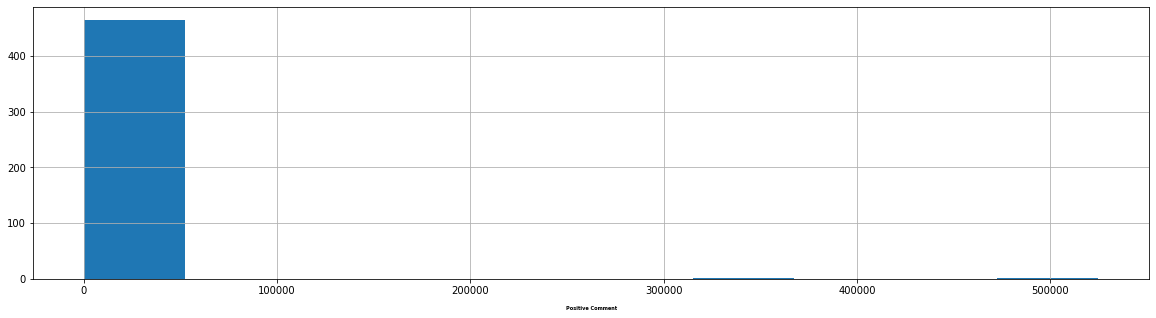

In [44]:
h1 = final_file1
plt.figure(figsize=(20,5))
hist1 = h1['positive_comment'].hist()
hist1.set_xlabel("Positive Comment", labelpad=10, weight='bold', size=5)


Text(0.5, 1.0, 'Positve comment reviewed in top 10 cities of London Airbnb Data')

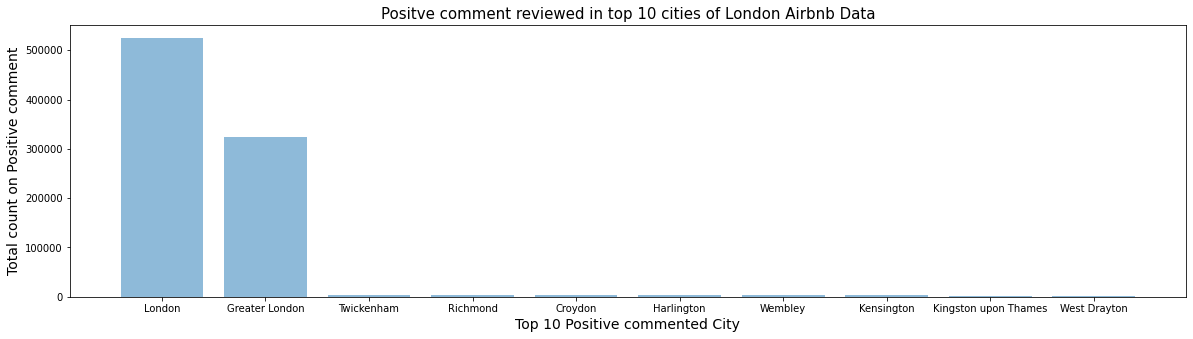

In [45]:
top_10_most_positive_commented_city = final_file1.head(10)
plt.figure(figsize=(20,5))
#plt.bar(np.arange(len(top_10_most_positive_commented_city)), top_10_most_positive_commented_city.index, align='center', alpha=0.5)
plt.bar(top_10_most_positive_commented_city.index , top_10_most_positive_commented_city['positive_comment'], align='center', alpha=0.5)
plt.ylabel('Total count on Positive comment',fontsize=14)
plt.xlabel('Top 10 Positive commented City',fontsize=14)
plt.title('Positve comment reviewed in top 10 cities of London Airbnb Data',fontsize=15)

Text(0.5, 1.0, 'Negative comment reviewed in top 10 cities of London Airbnb Data')

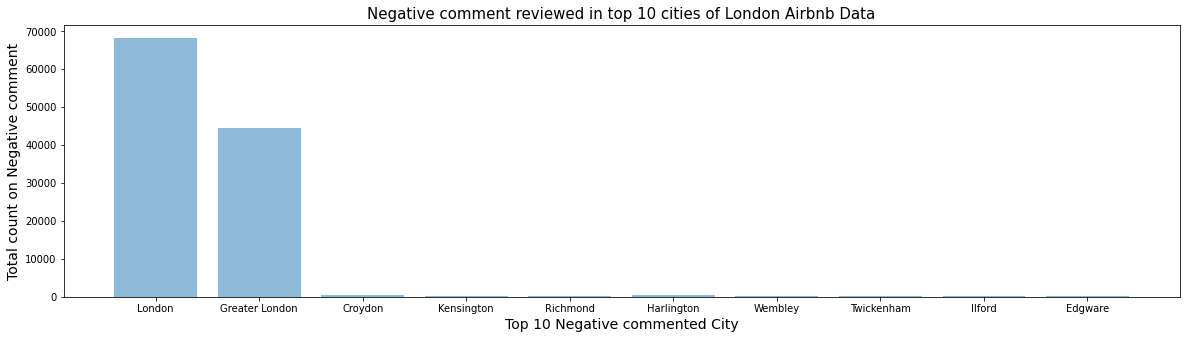

In [46]:
top_10_most_negative_commented_city = final_file3.head(10)
plt.figure(figsize=(20,5))
#plt.bar(np.arange(len(top_10_most_negative_commented_city)), top_10_most_negative_commented_city.index, align='center', alpha=0.5)
plt.bar(top_10_most_negative_commented_city.index , top_10_most_negative_commented_city['negative_comment'], align='center', alpha=0.5)
plt.ylabel('Total count on Negative comment',fontsize=14)
plt.xlabel('Top 10 Negative commented City',fontsize=14)
plt.title('Negative comment reviewed in top 10 cities of London Airbnb Data',fontsize=15)

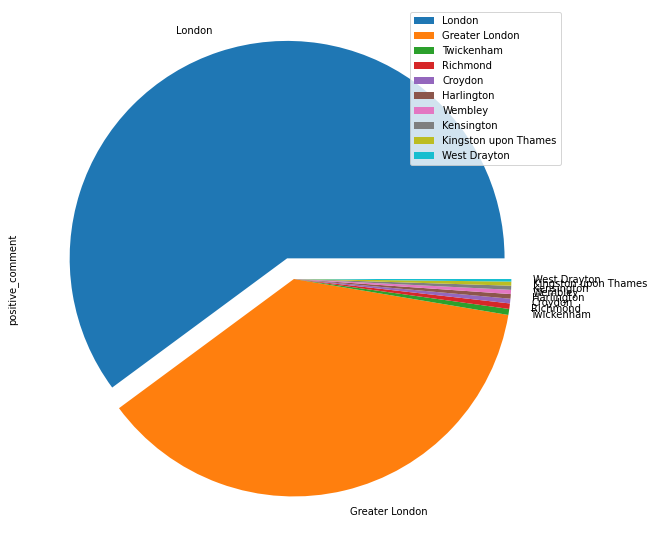

In [47]:
#Pie chart
top_10_most_positive_commented_city = final_file1.head(10)

positive_plot = top_10_most_positive_commented_city.plot.pie(y = 'positive_comment', figsize=(10, 10), explode = [0.1,0,0,0,0,0,0,0,0,0])



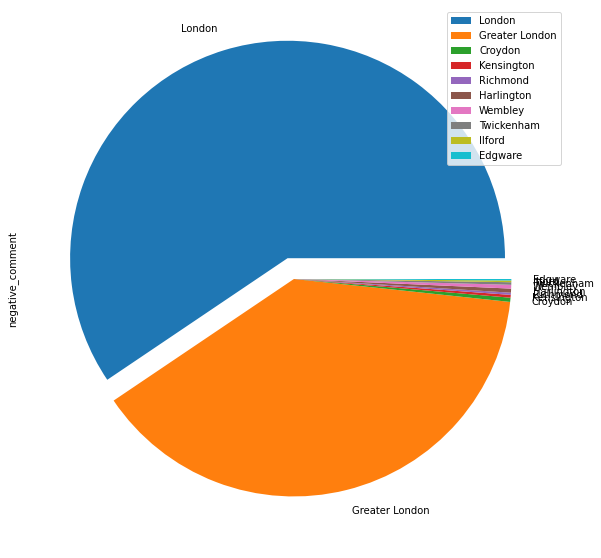

In [48]:
# Pie chart
top_10_most_negative_commented_city = final_file3.head(10)
negative_plot = top_10_most_negative_commented_city.plot.pie(y = 'negative_comment', figsize=(10, 10), explode = [0.1,0,0,0,0,0,0,0,0,0])

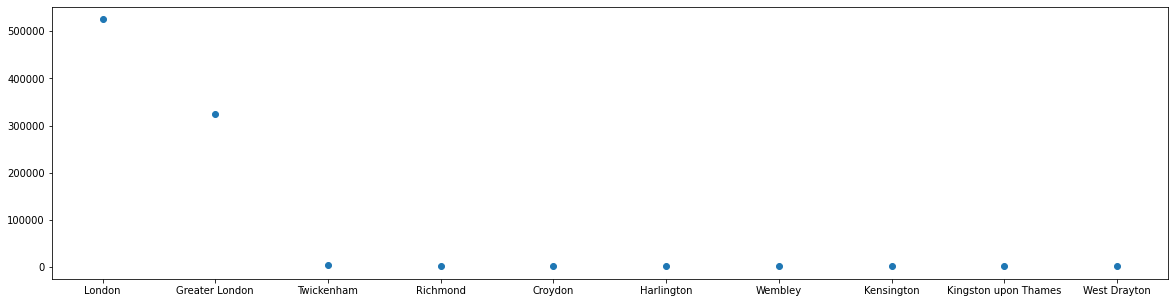

In [49]:
#final_file1.head(10)
#scatter_plot
plt.figure(figsize=(20,5))
plt.scatter(top_10_most_positive_commented_city.index, top_10_most_positive_commented_city['positive_comment'])

plt.show()

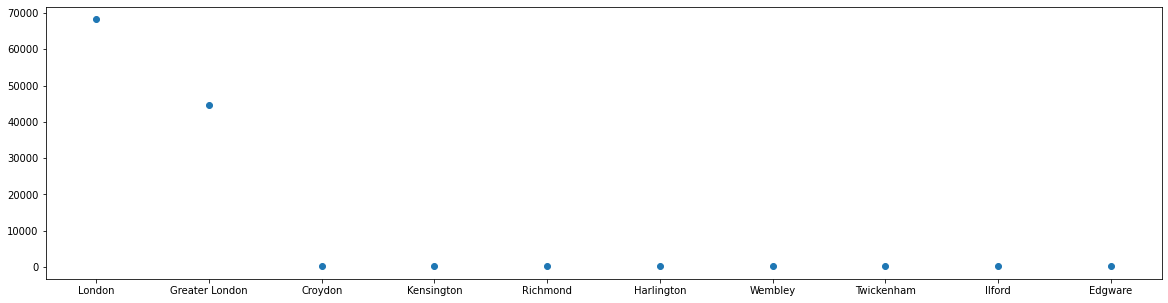

In [50]:
#scatter plot
plt.figure(figsize=(20,5))
plt.scatter(top_10_most_negative_commented_city.index, top_10_most_negative_commented_city['negative_comment'])

plt.show()